In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split 
import os

In [7]:
os.system("kaggle datasets download -d biratpoudelrocks/nepali-sign-language-character-dataset -p ./data --unzip")
path = "./data"
print("Path to dataset files:", path) #to import the dataset one must download api from kaggle  and paste it in %HOMEPATH%\.kaggle\

Path to dataset files: ./data


In [9]:
print("Files in dataset path:", os.listdir(path))

Files in dataset path: ['NSL']


In [11]:
dataset_path = './data'

# Check if the dataset directory exists
if os.path.exists(dataset_path):
    print("Dataset is installed!")
else:
    print("Dataset is not found!")


Dataset is installed!


In [13]:
DATASET_PATH = "./data/NSL"  # Adjust if needed

print("Checking dataset structure...")
for root, dirs, files in os.walk(DATASET_PATH):
    print(f"Folder: {root}, Contains: {len(files)} images")


Checking dataset structure...
Folder: ./data/NSL, Contains: 2 images
Folder: ./data/NSL\Plain Background, Contains: 0 images
Folder: ./data/NSL\Plain Background\0, Contains: 1000 images
Folder: ./data/NSL\Plain Background\1, Contains: 1000 images
Folder: ./data/NSL\Plain Background\10, Contains: 1000 images
Folder: ./data/NSL\Plain Background\11, Contains: 1000 images
Folder: ./data/NSL\Plain Background\12, Contains: 1000 images
Folder: ./data/NSL\Plain Background\13, Contains: 1000 images
Folder: ./data/NSL\Plain Background\14, Contains: 1000 images
Folder: ./data/NSL\Plain Background\15, Contains: 1000 images
Folder: ./data/NSL\Plain Background\16, Contains: 1000 images
Folder: ./data/NSL\Plain Background\17, Contains: 1000 images
Folder: ./data/NSL\Plain Background\18, Contains: 1000 images
Folder: ./data/NSL\Plain Background\19, Contains: 1000 images
Folder: ./data/NSL\Plain Background\2, Contains: 1000 images
Folder: ./data/NSL\Plain Background\20, Contains: 1000 images
Folder: ./

In [15]:
IMG_SIZE = 64
DATASET_PATH = './data/NSL'

label_map = {label: idx for idx, label in enumerate(sorted(os.listdir(os.path.join(DATASET_PATH, "Plain Background"))))}

data = []
for category in ["Plain Background", "Random Background"]:
    print(f"Processing {category} images...")
    category_path = os.path.join(DATASET_PATH, category)

    for label in sorted(os.listdir(category_path)):
        label_folder = os.path.join(category_path, label)

        if not os.path.isdir(label_folder):  # Fix: Check `label_folder` instead of `category_path`
            continue

        for img_name in os.listdir(label_folder):
            img_path = os.path.join(label_folder, img_name)

            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append([img, label_map[label]])  # Use mapped integer label

X, y = zip(*data)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = np.array(y, dtype=np.int64)  # Ensure y is an integer array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Processing Plain Background images...
Processing Random Background images...


In [17]:
len(X_train), len(X_test)

(43200, 10800)

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input

In [21]:
model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 1)),  # Define input shape separately
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Save the trained model
model.save("nsl_sign_language_model.keras")
print("Model training complete and saved!")

Epoch 1/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.5061 - loss: 1.6639 - val_accuracy: 0.9481 - val_loss: 0.1829
Epoch 2/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.9508 - loss: 0.1659 - val_accuracy: 0.9730 - val_loss: 0.0892
Epoch 3/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.9769 - loss: 0.0742 - val_accuracy: 0.9803 - val_loss: 0.0699
Epoch 4/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.9832 - loss: 0.0539 - val_accuracy: 0.9865 - val_loss: 0.0465
Epoch 5/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.9905 - loss: 0.0301 - val_accuracy: 0.9869 - val_loss: 0.0467
Epoch 6/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.9898 - loss: 0.0319 - val_accuracy: 0.9887 - val_loss: 0.0453
Epoch 7/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.9941 - loss: 0.0180 - val_accuracy: 0.9831 - val_loss: 0.0559
Epoch 8/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - accuracy: 0.9927 -

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,066,286 (4.07 MB)

 Trainable params: 355,428 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 710,858 (2.71 MB)

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.4f}")

338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9878 - loss: 0.0734
Test Accuracy: 98.8519


338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
The predicted label is 31


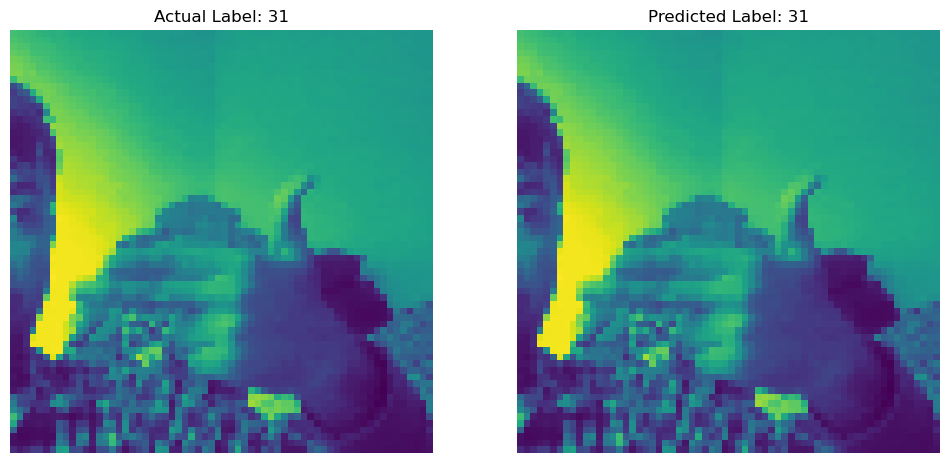

In [27]:
import numpy as np
import matplotlib.pyplot as plt

index = 14

# Get the predicted class for the 6th image
y_pred1 = model.predict(X_test)[index]
y_pred1_classes = np.argmax(y_pred1)  # Get the predicted label

# Print predicted label
print("The predicted label is", y_pred1_classes)

# Index to select the image
image = X_test[index]
label = y_test[index]  # Actual label from y_test

# Convert image to suitable format (if needed)
image = (image * 255).astype(np.uint8)  # Assuming image is in float32 in the range [0, 1]

# Plotting both actual and predicted images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the actual image
ax[0].imshow(image)
ax[0].set_title(f'Actual Label: {label}')
ax[0].axis('off')  # Hide the axes

# Plot the predicted image
ax[1].imshow(image)
ax[1].set_title(f'Predicted Label: {y_pred1_classes}')
ax[1].axis('off')  # Hide the axes

plt.show()


338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step 


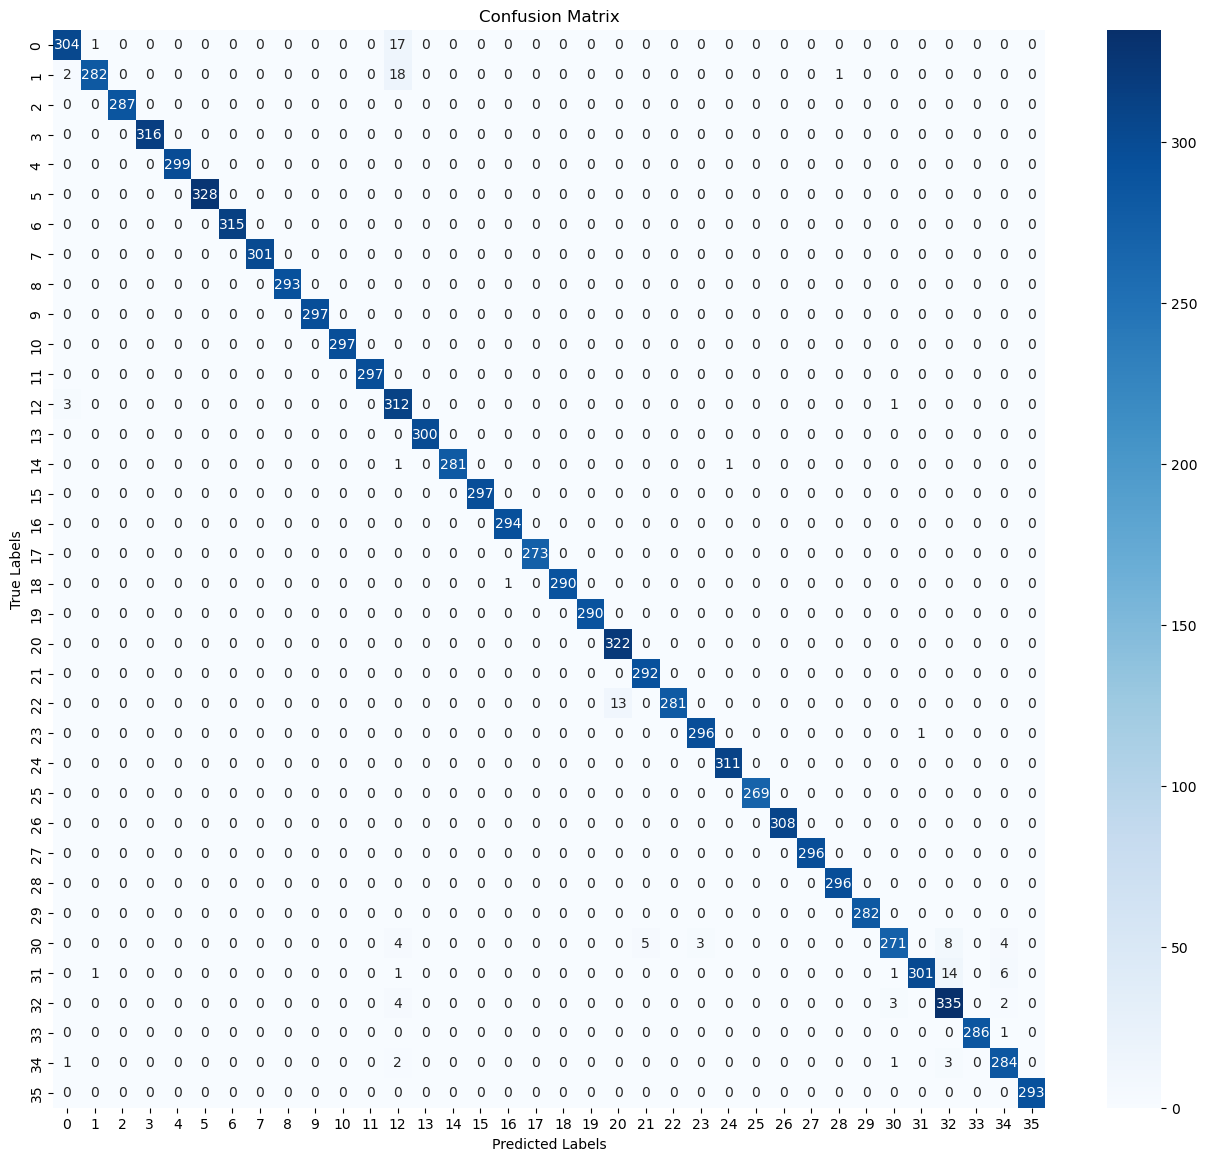

In [29]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from your trained model
y_pred = model.predict(X_test)  # Assuming 'model' is your trained model
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Compute confusion matrix
cm = tf.math.confusion_matrix(y_test, y_pred_classes, num_classes=len(np.unique(y_test)))

# Convert to NumPy array for visualization
cm = cm.numpy()

# Plot confusion matrix
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


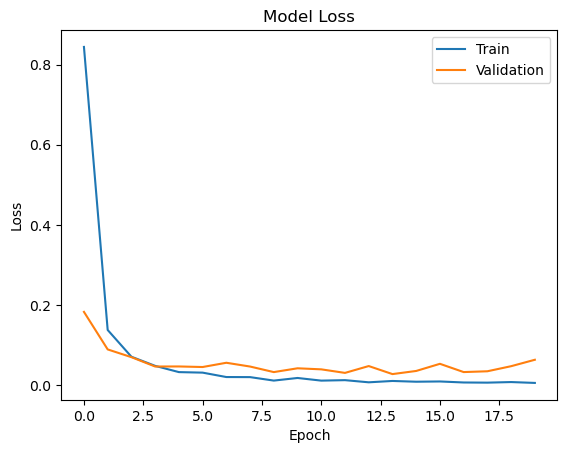

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

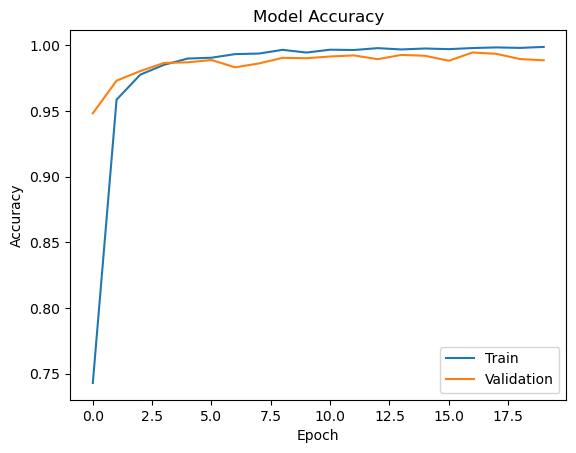

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [35]:
loaded_model = tf.keras.models.load_model("nsl_sign_language_model.keras")

In [31]:
!pip install --user mediapipe

In [57]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [32]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp

# Load the trained model
model = tf.keras.models.load_model("nsl_sign_language_model.keras")

# Define constants
IMG_SIZE = 64  # The image size used during training
LABELS = {i: str(i) for i in range(35)}  # Adjust the number of labels based on your dataset

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)

# Open the webcam
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

print("Webcam is open. Starting video capture...")

# Start real-time prediction
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Check if frame is read correctly
    if not ret:
        print("Error: Failed to capture image.")
        break

    # Convert frame to RGB for MediaPipe
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Hands
    results = hands.process(rgb_frame)

    # Initialize a flag to check if a hand is detected
    hand_detected = False

    if results.multi_hand_landmarks:
        hand_detected = True

        # Extract the bounding box of the hand
        for hand_landmarks in results.multi_hand_landmarks:
            # Get the bounding box coordinates
            x_min = int(min([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1])
            y_min = int(min([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0])
            x_max = int(max([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1])
            y_max = int(max([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0])

            # Draw the bounding box on the frame
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

            # Crop the hand region
            hand_crop = frame[y_min:y_max, x_min:x_max]

            # Preprocess the cropped hand region
            if hand_crop.size != 0:  # Ensure the crop is not empty
                gray = cv2.cvtColor(hand_crop, cv2.COLOR_BGR2GRAY)
                resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE)) / 255.0  # Normalize the image
                input_img = np.expand_dims(resized, axis=(0, -1))  # Add batch and channel dimensions

                # Make prediction
                predictions = model.predict(input_img, verbose=0)  # Suppress prediction logs
                predicted_class = np.argmax(predictions)
                confidence = np.max(predictions)  # Get the confidence score
                predicted_label = LABELS.get(predicted_class, "Unknown")

                # Display the predicted sign language gesture and confidence
                cv2.putText(frame, f"Sign: {predicted_label}", (10, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                cv2.putText(frame, f"Confidence: {confidence:.2f}", (10, 90),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                # Debugging: Display the preprocessed input image
                debug_img = (resized * 255).astype(np.uint8)  # Convert back to 0-255 range for display
                cv2.imshow("Preprocessed Input", debug_img)

                # Debugging: Print raw predictions
                print("Raw Predictions:", predictions)
                print("Predicted Class:", predicted_class)
                print("Confidence:", confidence)

    # If no hand is detected, display a message
    if not hand_detected:
        cv2.putText(frame, "No hand detected", (10, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the frame
    cv2.imshow("Real-Time Sign Language Recognition", frame)

    # Check if the window is updated, or if keypress occursq
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        print("Exiting... Pressed 'q'.")
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()

Webcam is open. Starting video capture...
Raw Predictions: [[1.79032654e-01 8.51811899e-04 3.70299236e-10 2.41094731e-11
  8.69108703e-07 6.93849623e-01 1.87152034e-06 2.53055077e-05
  1.48544373e-07 1.58505674e-04 2.56113498e-03 1.65363643e-04
  1.80038507e-04 2.37964596e-05 7.62434283e-05 1.92378702e-05
  2.27728267e-10 1.11645917e-04 4.26977698e-09 1.72803345e-06
  2.31127227e-12 1.00454907e-08 2.96771274e-10 6.76231866e-04
  9.99780896e-05 6.58694538e-04 1.18936159e-01 5.18452055e-07
  4.48744819e-09 1.08629065e-04 1.84040152e-06 5.70067496e-04
  1.88524318e-05 1.86899246e-03 3.14362154e-08 5.02419191e-08]]
Predicted Class: 5
Confidence: 0.6938496
Raw Predictions: [[1.7970100e-01 8.0089927e-01 2.6149395e-13 2.2853447e-10 9.6509177e-07
  4.0428524e-12 3.1867866e-11 2.7886840e-10 1.7277879e-11 1.1343364e-12
  2.8331385e-07 9.5424941e-05 1.8538528e-03 1.1175311e-10 1.1882162e-09
  3.6384807e-07 1.8523876e-07 7.6852084e-05 2.5293280e-04 2.1669126e-05
  3.7727601e-05 1.3588309e-05 7.476

In [45]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
from PIL import ImageFont, ImageDraw, Image

# Load the trained model
model = tf.keras.models.load_model("nsl_sign_language_model.keras")

# Define constants
IMG_SIZE = 64  # The image size used during training

# Mapping detected digits to Nepali letters
nepali_letters = {
    0: "क", 1: "ख", 2: "ग", 3: "घ", 4: "ङ",
    5: "च", 6: "छ", 7: "ज", 8: "झ", 9: "ञ",
    10: "ट", 11: "ठ", 12: "ड", 13: "ढ", 14: "ण",
    15: "त", 16: "थ", 17: "द", 18: "ध", 19: "न",
    20: "प", 21: "फ", 22: "ब", 23: "भ", 24: "म",
    25: "य", 26: "र", 27: "ल", 28: "व", 29: "श",
    30: "ष", 31: "स", 32: "ह", 33: "क्ष", 34: "त्र", 35: "ज्ञ"
}

# Load English font
english_font = ImageFont.truetype("arial.ttf", 32)  # You can replace with any available font

# Load Nepali font (Ensure the font path is correct)
nepali_font_path = r"D:\Kalimati Regular\Kalimati Regular.otf"  # Update with the correct font path
nepali_font = ImageFont.truetype(nepali_font_path, 32)

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)

# Open the webcam
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

print("Webcam is open. Starting video capture...")

# Start real-time prediction
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Check if frame is read correctly
    if not ret:
        print("Error: Failed to capture image.")
        break

    # Convert frame to RGB for MediaPipe
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Hands
    results = hands.process(rgb_frame)

    # Initialize a flag to check if a hand is detected
    hand_detected = False
    detected_letter = "?"  # Default in case of no detection

    if results.multi_hand_landmarks:
        hand_detected = True

        # Extract the bounding box of the hand
        for hand_landmarks in results.multi_hand_landmarks:
            # Get the bounding box coordinates
            x_min = int(min([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1])
            y_min = int(min([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0])
            x_max = int(max([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1])
            y_max = int(max([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0])

            # Draw the bounding box on the frame
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

            # Crop the hand region
            hand_crop = frame[y_min:y_max, x_min:x_max]

            # Preprocess the cropped hand region
            if hand_crop.size != 0:  # Ensure the crop is not empty
                gray = cv2.cvtColor(hand_crop, cv2.COLOR_BGR2GRAY)
                resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE)) / 255.0  # Normalize the image
                input_img = np.expand_dims(resized, axis=(0, -1))  # Add batch and channel dimensions

                # Make prediction
                predictions = model.predict(input_img, verbose=0)  # Suppress prediction logs
                predicted_class = np.argmax(predictions)
                confidence = np.max(predictions)  # Get the confidence score

                # Get the corresponding Nepali letter
                detected_letter = nepali_letters.get(predicted_class, "?")

                # Debugging: Print raw predictions
                print("Raw Predictions:", predictions)
                print("Predicted Class:", predicted_class)
                print("Confidence:", confidence)

    # Convert frame to PIL for font rendering
    img_pil = Image.fromarray(frame)
    draw = ImageDraw.Draw(img_pil)

    # Draw English text (heading)
    draw.text((10, 50), "Detected Sign:", font=english_font, fill=(0, 0, 255))

    # Draw Nepali text (detected letter)
    draw.text((250, 50), detected_letter, font=nepali_font, fill=(0, 255, 0))

    # If no hand is detected, display a message
    if not hand_detected:
        draw.text((10, 100), "No hand detected", font=english_font, fill=(255, 0, 0))

    # Convert back to OpenCV format
    frame = np.array(img_pil)

    # Display the frame
    cv2.imshow("Real-Time Sign Language Recognition", frame)

    # Check if 'q' is pressed to exit
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        print("Exiting... Pressed 'q'.")
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


Webcam is open. Starting video capture...
Raw Predictions: [[9.9999952e-01 2.2355117e-14 6.2234273e-27 6.9176158e-28 1.4323180e-31
  2.3938334e-26 1.3748178e-22 4.6628682e-22 1.5419742e-22 1.7816470e-28
  4.8246903e-07 7.5892688e-18 3.3579771e-13 1.3525451e-19 1.3447534e-23
  3.0390896e-12 6.2178060e-26 2.5317647e-11 1.8582982e-26 1.3794487e-18
  2.3432243e-15 4.2058398e-10 2.1889011e-18 1.9527895e-09 1.8889200e-22
  1.4467925e-17 3.6291476e-14 6.0795282e-16 1.5710128e-08 5.5443163e-20
  3.1385602e-11 6.6201093e-14 4.7819582e-10 5.4022775e-30 3.3441580e-28
  2.2497639e-22]]
Predicted Class: 0
Confidence: 0.9999995
Raw Predictions: [[9.99999881e-01 3.98790723e-11 1.67188564e-34 0.00000000e+00
  2.73038797e-31 4.81474445e-28 6.84155500e-16 1.62298409e-26
  9.44047318e-31 1.12256934e-29 9.48652001e-08 4.71799689e-14
  1.08826823e-10 1.12063855e-24 3.39847715e-23 5.50807050e-16
  1.37031466e-23 4.87298570e-13 9.20862141e-27 1.47323182e-23
  5.16095184e-15 5.58400819e-13 6.56847118e-17 4.31